Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


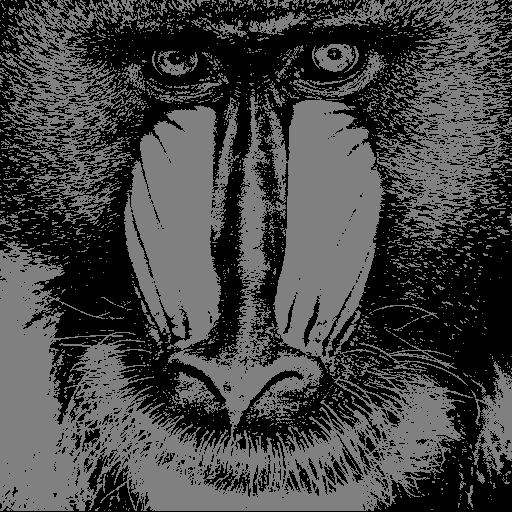

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

# Input image path
image_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"

# Number of quantization levels (L)
L = 2

# Read the image in grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure L is within valid range
L = max(1, min(256, L))

# Convert to float for calculations
img = img.astype(np.float64)

# Calculate quantization step size
q = 256.0 / L

# Perform quantization
quantized_img = np.floor(img / q) * q

# Convert back to uint8 for image display
quantized_img = quantized_img.astype(np.uint8)

# Display the quantized image
cv2_imshow(quantized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


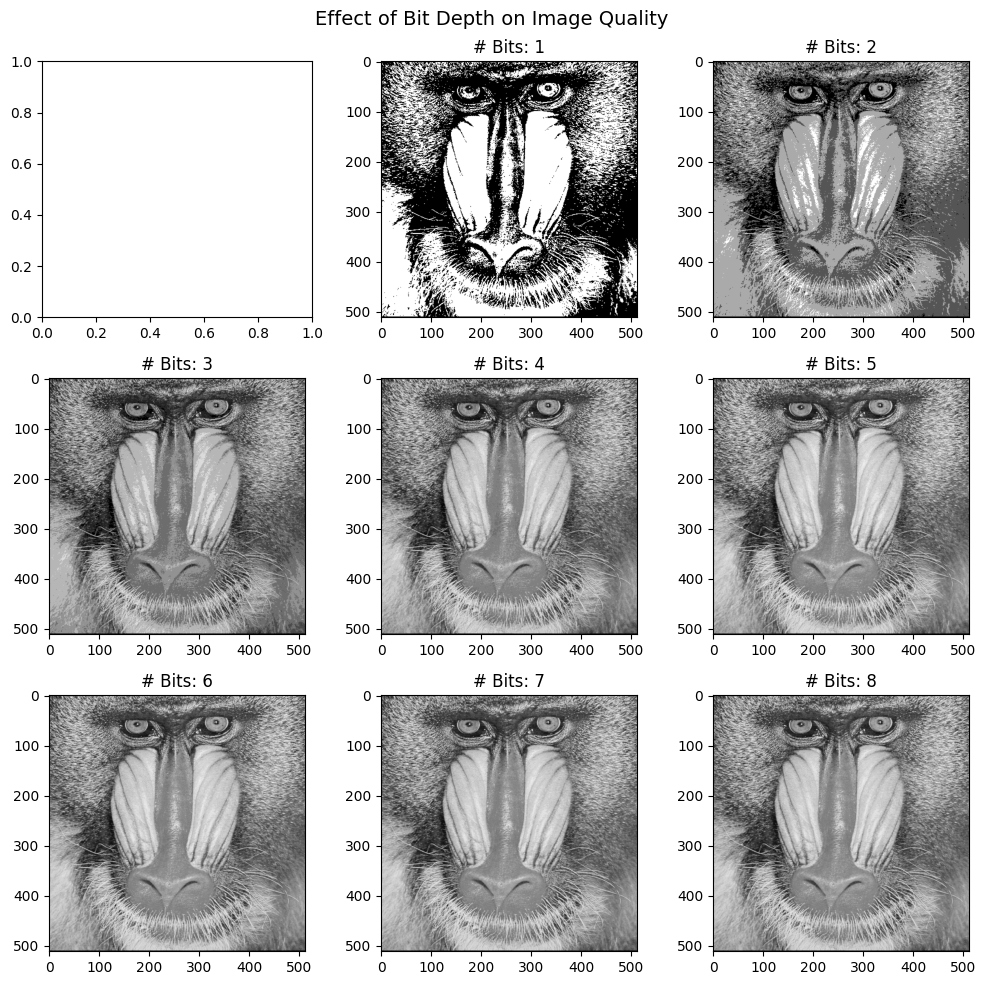

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input image path
image_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create a figure for subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle("Effect of Bit Depth on Image Quality", fontsize=14)

# Quantize and display images with varying bit depths
for b in range(1, 9):
  bits = b

  # Convert image to float for calculations
  image_copy = image.astype(np.float64)

  # Calculate quantization step size
  q = 256.0 / (2**bits)

  # Perform quantization
  quantized_image = np.floor(image_copy / q) * q

  # Convert back to uint8 for display
  quantized_image = quantized_image.astype(np.uint8)

  # Display the quantized image
  axes[b // 3, b % 3].imshow(quantized_image, cmap="gray")
  axes[b // 3, b % 3].set_title(f"# Bits: {bits}", fontsize=12)

plt.tight_layout()
plt.show()


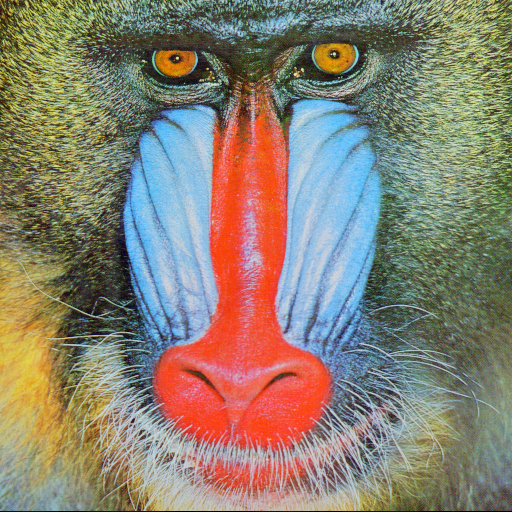

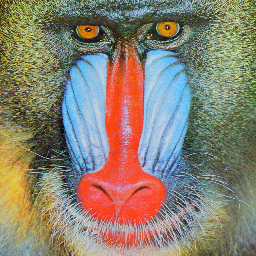

In [ ]:
# Input image path
image_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"

# Read the image
img = cv2.imread(image_path)

# Show the original image
cv2_imshow(img)
cv2.waitKey(0)

# Downsampling factor (Fs)
Fs = 2

# Downsample by selecting every Fs-th row and column
sampled_image = img[::Fs, ::Fs]

# Show the downsampled image
cv2_imshow(sampled_image)
cv2.waitKey(0)

# Save the downsampled image (optional)
cv2.imwrite("/content/drive/MyDrive/Image_Processing_Photos/Baboon_Downsampled.bmp", sampled_image)

cv2.destroyAllWindows()


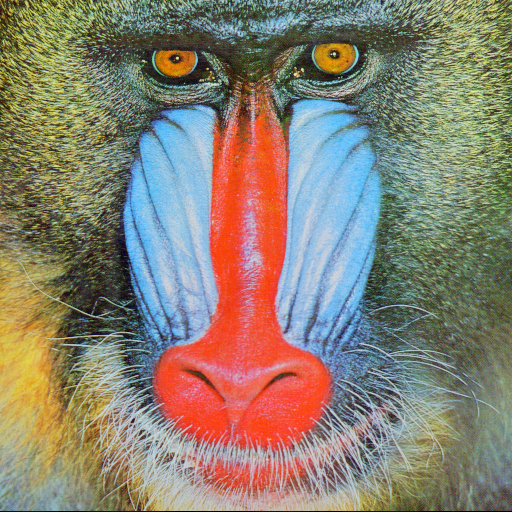

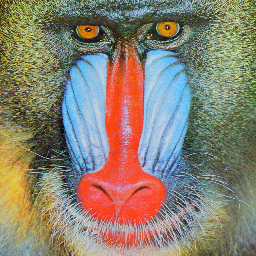

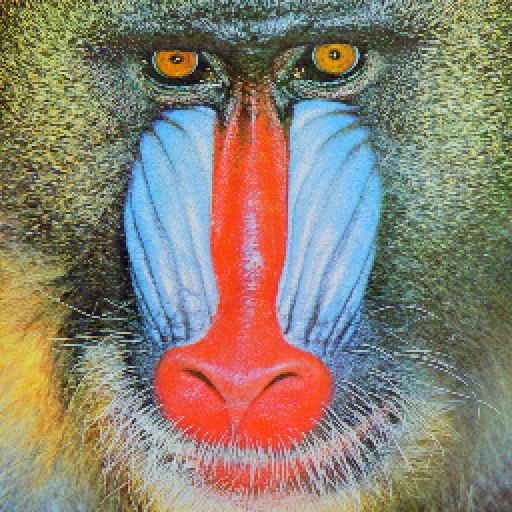

In [ ]:
import cv2
import numpy as np

# Input image paths
original_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"
downsampled_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon_Downsampled.bmp"

# Read the images
original_image = cv2.imread(original_path)
downsampled_image = cv2.imread(downsampled_path)

# original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
# downsampled_image = cv2.cvtColor(downsampled_image, cv2.COLOR_BGR2RGB)

# Get image sizes
original_rows, original_cols = original_image.shape[:2]
downsampled_rows, downsampled_cols = downsampled_image.shape[:2]

# Upsample size (same as original)
upsampled_rows = original_rows
upsampled_cols = original_cols

# Ratio for upsampling
row_ratio = upsampled_rows / downsampled_rows
col_ratio = upsampled_cols / downsampled_cols

# Interpolated positions (using ceiling for nearest neighbor)
interpolated_rows = np.ceil(np.arange(1, (downsampled_rows * row_ratio) + 1) / row_ratio).astype(int)
interpolated_cols = np.ceil(np.arange(1, (downsampled_cols * col_ratio) + 1) / col_ratio).astype(int)

# Row-wise interpolation (pixel replication)
upsampled_image = downsampled_image[:, interpolated_cols - 1]  # Avoid index out of bounds with -1

# Column-wise interpolation (pixel replication)
upsampled_image = upsampled_image[interpolated_rows - 1, :]

# # Display original and modified images
# plt.subplots(figsize=(12, 8))
# plt.subplot(1, 3, 1)
# plt.imshow(original_image, cmap="gray")
# plt.title("Original Image")

# plt.subplot(1, 3, 2)
# plt.imshow(downsampled_image, cmap="gray")
# plt.title("Downsampled Image")

# plt.subplot(1, 3, 3)
# plt.imshow(upsampled_image, cmap="gray")
# plt.title("Upsampled Image")

# plt.show()

# Display images
cv2_imshow(original_image)
cv2_imshow(downsampled_image)
cv2_imshow(upsampled_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-10-4d75411754ab>:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


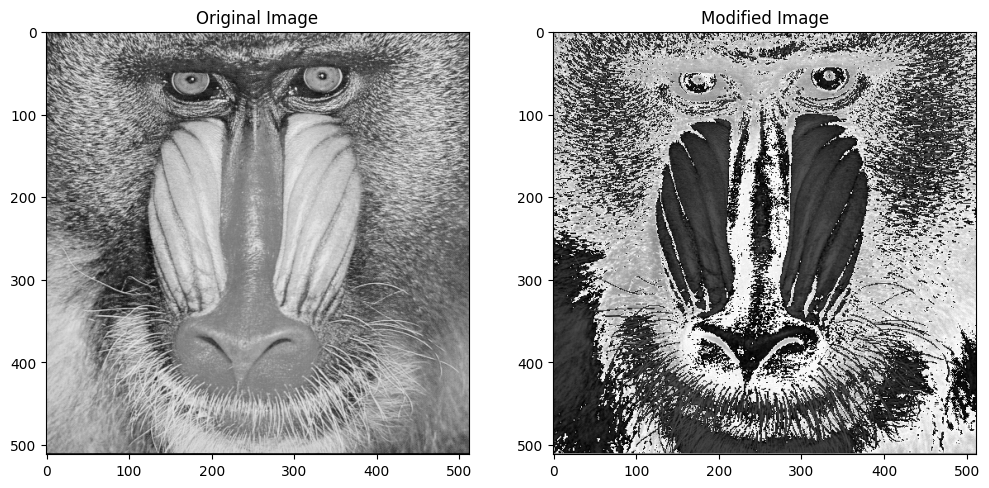

In [ ]:
# Input image path
image_path = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"

# Operations to perform
operations = ["invert"]

# Read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Process the image pixel-wise
modified_image = image.copy()
for op in operations:
  if op == "invert":
    modified_image = 255 - modified_image
  elif op == "darken":
    modified_image = modified_image - 128
  elif op == "lighten":
    modified_image = modified_image + 128
  elif op == "rcontrast":
    modified_image = modified_image * 2
  elif op == "lcontrast":
    modified_image = modified_image // 2

# Display original and modified images
plt.subplots(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(modified_image, cmap="gray")
plt.title("Modified Image")

plt.show()


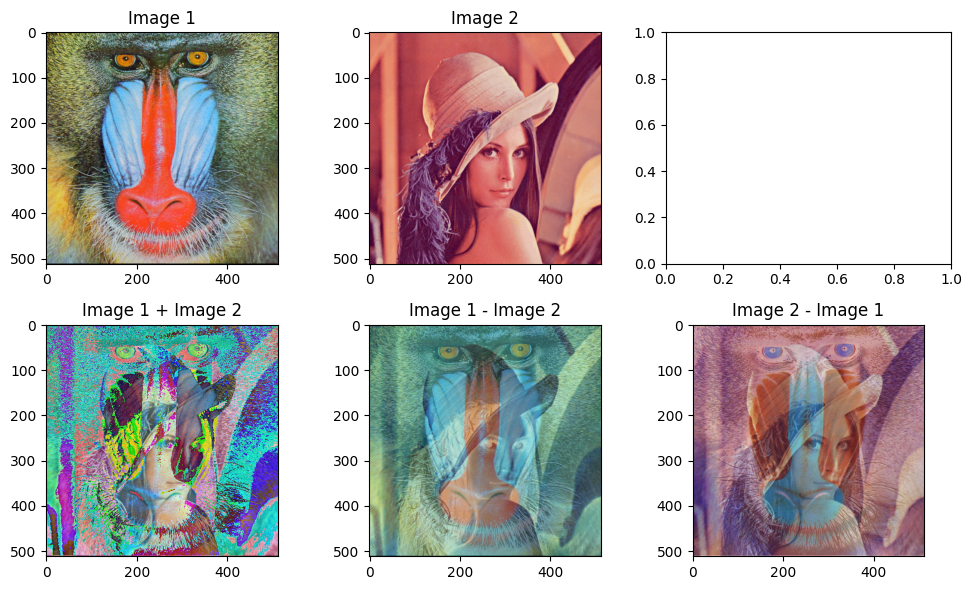

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input image paths
image_path1 = "/content/drive/MyDrive/Image_Processing_Photos/Baboon.bmp"
image_path2 = "/content/drive/MyDrive/Image_Processing_Photos/Lena.bmp"

# Read the images
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Convert to float for calculations
image1_float = image1.astype(np.float64)
image2_float = image2.astype(np.float64)

# Create a figure for subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# Display original images
axes[0, 0].imshow(image1)
axes[0, 0].set_title("Image 1")
axes[0, 1].imshow(image2)
axes[0, 1].set_title("Image 2")

# Image addition (overflow handling)
result_add = image1.copy() + image2.copy()
result_add = np.clip(result_add, 0, 255).astype(np.uint8)  # Clip values to stay within 0-255 range
axes[1, 0].imshow(result_add)
axes[1, 0].set_title("Image 1 + Image 2")

# Image subtraction (overflow handling)
result_sub1 = image1_float - image2_float  # Convert to float for subtraction
result_sub1 = (result_sub1 + 255) / 2  # Scale and convert to uint8
result_sub1 = result_sub1.astype(np.uint8)
axes[1, 1].imshow(result_sub1)
axes[1, 1].set_title("Image 1 - Image 2")

result_sub2 = image2_float - image1_float
result_sub2 = (result_sub2 + 255) / 2  # Scale and convert to uint8
result_sub2 = result_sub2.astype(np.uint8)
axes[1, 2].imshow(result_sub2)
axes[1, 2].set_title("Image 2 - Image 1")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
